<a href="https://colab.research.google.com/github/dustin-kang/Proj1_GameDesignAnalysis/blob/main/code/Proj1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. EDA**

## 1-1. 데이터 확인

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/vgames2.csv')
data = data.drop(columns="Unnamed: 0")
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
data.shape

(16598, 9)

16598개의 데이터가 존재하고 9개의 컬럼이 있음을 확인할 수 있었다.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [6]:
data[data.Year.isna() == True].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03


In [7]:
data[data.Genre.isna() == True].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79


In [8]:
data[data.Publisher.isna() == True].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0


In [9]:
data.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

Data의 결측치를 확인해봤을 경우,
- `Year` : 271개
- `Genre` : 50개
- `Publisher` : 58개

등의 데이터에서 결측치가 있는 것으로 확인이 되었다.

추가적으로, Sales(출고량) 데이터는 Object 형이므로 이상치가 있음이 확인된다.


## 1-2. 데이터 이상치 및 결측치 보완


### 1-2-1. `Year` 데이터 이상치 보완
만약에 Year 데이터에도 잘못 기재된 이상치가 존재할 수 있다. \
그래서 이상치가 있는지 확인을 해보고 수정하기로 했다.

In [10]:
years = data.Year.unique()

tmp = []
for i in years:
  if i < 1900:
    tmp.append(i)

tmp

[9.0,
 97.0,
 11.0,
 15.0,
 3.0,
 96.0,
 6.0,
 8.0,
 1.0,
 5.0,
 4.0,
 10.0,
 98.0,
 7.0,
 16.0,
 86.0,
 14.0,
 95.0,
 2.0,
 13.0,
 0.0,
 12.0,
 94.0]

역시나 이상수치가 있다는 것을 알게되었다.
위 이상수치를 `tmp`에 담았으니,
- 80년대와 90년대를 나타내는 것은 1900를 더하고
- 그외 숫자들은 2000년을 더해

이상수치를 보완하는것이 좋겠다.

In [11]:
condition1 = data.Year.values <= 80
condition2 = data.Year.values >= 80
condition3 = data.Year.values <= 100

data.loc[condition1, 'Year'] += 2000
data.loc[(condition2) & (condition3), 'Year'] += 1900

data.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

### 1-2-2. `Year`, `publisher`, `genre` 결측치 보완
이상치에 대해서 보완이 끝났으니 이젠 271개의 Year 데이터의 결측치를 보완하기로 했다.

데이터 수 16598 -> 16241로 제거 했어도 데이터 크기에 크게 영향을 미치지 않은 것 같다.

>물론 selenium이나 크롤링으로 데이터를 수집할 수 있으나, 아직 이 크롤링 기법들은 섹션에서 배우지 않았음을 가정하에 진행 하였다.

In [12]:
data[data.Year.isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [13]:
data.Year.isna().sum()

271

In [14]:
data_1 = data.copy() #  Publisher 은  반드시 들어갈 내용이 없기 때문

In [15]:
data = data.dropna()

In [16]:
data.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [17]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [18]:
data.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

이제 마지막으로 `Year` 데이터를 int 형식으로 보기 편하게 바꿔주려고 한다.

In [19]:
data[data.columns[2]] = data[data.columns[2]].astype(int)

### 1-2-3. `Sales` 데이터 이상치 보완

처음 봤을 때, 단위의 수를 이해할 수 없었다.
 하지만 예상이 가는건,

In [20]:
data.NA_Sales.value_counts()

0       4367
0.02     524
0.03     518
0.01     516
0.04     515
        ... 
5.89       1
6.91       1
6.05       1
2.39       1
9.67       1
Name: NA_Sales, Length: 489, dtype: int64

In [21]:
data.EU_Sales.value_counts()

0        5543
0.01     1443
0.02     1230
0.03      905
0.04      719
         ... 
2.64        1
0.16M       1
2.51        1
2.4         1
9.26        1
Name: EU_Sales, Length: 360, dtype: int64

몇몇 작은 데이터들이 `M` 이나 `K` 같은 키워드를 쓰는 것으로 확인할 수 있다.

 정확한 파악을 위해 M, K가 포함된(`contain`)된 데이터들을 따로 데이터프레임으로 만들었습니다.

In [22]:
data[data.NA_Sales.str.contains('K')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0K,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0K,0,0.04,0
1086,Pro Evolution Soccer 2014,3DS,2013,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15647,Championship Manager 2010,PC,2009,Sports,Eidos Interactive,0K,0.01,0,0
16194,Vin Diesel: Wheelman,PS3,2009,Racing,Ubisoft,120K,0.15,0,0.06
16330,Midway Arcade Treasures,PS2,2003,Misc,Midway Games,720K,0.56,0,0.19
16492,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [23]:
data[data.NA_Sales.str.contains('M')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
447,Medal of Honor: Warfighter,X360,2012,Action,Electronic Arts,0.58M,0.47,0.01,0.1
458,F1 2010,PS3,2010,Racing,Codemasters,0.25M,0.76,0.08,0.27
577,Mario Kart 64,N64,1996,Racing,Nintendo,5.55M,1.94,2.23,0.15
625,The Hobbit,GBA,2003,Platform,Vivendi Games,0.14M,0.05,0,0
672,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008,Action,LucasArts,1.23M,0.3,0,0.14
...,...,...,...,...,...,...,...,...,...
15986,Juiced 2: Hot Import Nights,PC,2007,Racing,THQ,0M,0.01,0,0
16152,Taiko no Tatsujin Wii,Wii,2008,Misc,Namco Bandai Games,0M,0,0.67,0
16169,Medal of Honor: Airborne,X360,2007,Shooter,Electronic Arts,0.45M,0.53,0.01,0.12
16408,NASCAR 06: Total Team Control,PS2,2005,Racing,Electronic Arts,0.53M,0.02,0,0.09


확인해보니, 기준 단위는 백만단위 인것으로 알 수 있었다.

- M : 백만을 의미하며 그냥 'M'이라는 글자만 지워도 괜찮다고 생각한다. (1,000,000 = 1M)
- K : 숫자 1,000을 의미한다. 그래서 10,000을 10K로 표기하곤 한다.

> 60K = 60,000 = 0.06  

즉, K는 1000을 나눠 주면 된다.


In [24]:
# Sales
Sales = data.iloc[:,5:]

def to_M(data):
  for col in Sales:
    # K, M가 있는 데이터 가져오기
    sale_k = data.loc[data[col].str.contains('K'), col]
    sale_m = data.loc[data[col].str.contains('M'), col]
    # `replace` 를 이용하여 'K'나 'M'을 문자열 수정하기
    sale_k = sale_k.str.replace('K','').astype(float) / 1000
    sale_m = sale_m.str.replace('M','').astype(float) 
    # 기존 type이 string이기 때문에 우선 string으로 변경해서 저장
    data.loc[data[col].str.contains('K'), col] = sale_k.astype(str)
    data.loc[data[col].str.contains('M'), col] = sale_m.astype(str)

to_M(data)
data.NA_Sales.value_counts()

0       4367
0.02     536
0.03     523
0.01     521
0.05     519
        ... 
2.39       1
2.9        1
3.88       1
5.58       1
9.67       1
Name: NA_Sales, Length: 408, dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16241 non-null  object
 1   Platform     16241 non-null  object
 2   Year         16241 non-null  int64 
 3   Genre        16241 non-null  object
 4   Publisher    16241 non-null  object
 5   NA_Sales     16241 non-null  object
 6   EU_Sales     16241 non-null  object
 7   JP_Sales     16241 non-null  object
 8   Other_Sales  16241 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [26]:
col = data.columns[5:]
data[col] = data[col].astype('float')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


깔끔하게 정리된 것을 확인할 수 있었다.

### 1-2-4. 새로운 컬럼 추가 (전체 출고량)

In [28]:
data = data.reset_index().drop(columns='index')

In [29]:
Total_sales = []

for i in data.index:
  Total_s = data.iloc[i, 5:10].sum()
  Total_sales.append(round(Total_s,2))

data['Total_Sales'] = Total_sales


In [30]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [31]:
data.to_csv("vgame_eda.csv", index=False)

### 번외) `Publisher`의 na를 Various로 변경했을 때


In [32]:
data_1.loc[data_1.Publisher.isna(), "Publisher"] = "Unknown"

In [33]:
data_1.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [34]:
data_1 = data_1.dropna()

In [35]:
data_1['Year'] = data_1.iloc[:,2].astype(int)

In [36]:
data_1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [37]:
# Sales
Sales = data_1.iloc[:,5:]

def to_M(data):
  for col in Sales:
    # K, M가 있는 데이터 가져오기
    sale_k = data.loc[data[col].str.contains('K'), col]
    sale_m = data.loc[data[col].str.contains('M'), col]
    # `replace` 를 이용하여 'K'나 'M'을 문자열 수정하기
    sale_k = sale_k.str.replace('K','').astype(float) / 1000
    sale_m = sale_m.str.replace('M','').astype(float) 
    # 기존 type이 string이기 때문에 우선 string으로 변경해서 저장
    data.loc[data[col].str.contains('K'), col] = sale_k.astype(str)
    data.loc[data[col].str.contains('M'), col] = sale_m.astype(str)

data.NA_Sales.value_counts()

0.00    4421
0.02     536
0.03     523
0.01     521
0.05     519
        ... 
3.78       1
3.02       1
3.83       1
9.43       1
4.98       1
Name: NA_Sales, Length: 407, dtype: int64

In [38]:
to_M(data_1)

In [39]:
data_1.NA_Sales.value_counts()

0       4375
0.02     536
0.03     524
0.01     523
0.05     519
        ... 
4.89       1
3.5        1
2.52       1
4.52       1
9.67       1
Name: NA_Sales, Length: 408, dtype: int64

In [40]:
def to_int(data):
  col = data.columns[5:]
  data[col] = data[col].astype('float')
  data = data.reset_index().drop(columns='index')

to_int(data_1)

In [41]:
Total_sales = []
for i in data_1.index:
    Total_s = data_1.loc[i, 'NA_Sales':'Other_Sales'].sum()
    Total_sales.append(round(Total_s,2))

data_1['Total_Sales'] = Total_sales

In [42]:
data_1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [43]:
data_1.to_csv("vgame_eda_1.csv", index=False)

# **2. Visuallization**

정제된 데이터를 새로 불러오기로 했다.

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# STEP 1 : 나눔폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# STEP 2 : 코랩(Colab)의 런타임을 재시작 합니다.
# 런타임 재시작

# STEP 3 : 나눔 폰트 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [46]:
data = pd.read_csv('/content/vgame_eda_1.csv')
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


## 2-1. 지역에 따라서 선호하는 게임 장르

In [47]:
data_a = data.iloc[:,3:].drop(['Publisher','Total_Sales'], axis=1)
data_a = data_a.rename({'NA_Sales':'미국', 'EU_Sales':'유럽',	'JP_Sales':'일본',	'Other_Sales':'나머지 국가'}, axis=1)
data_a

,Genre,미국,유럽,일본,나머지 국가
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16272,Platform,0.15,0.04,0.00,0.01
16273,Action,0.01,0.00,0.00,0.00
16274,Sports,0.44,0.19,0.03,0.13
16275,Action,0.05,0.05,0.25,0.03


장르와 지역만 남기기 위해 수정을 한 상태이다.

In [48]:
data_a = data_a.groupby('Genre').sum()
data_a1 = data_a.groupby('Genre').sum().reset_index()
data_a1 = data_a1.melt(id_vars = ['Genre'], value_vars =  ['미국','유럽','일본','나머지 국가'], var_name='국가', value_name='판매량')

장르에 따라서 지역의 출고량의 합을 `Groupby`라는 메서드를 통해 새로 정리를 한 상태이다.\
이후, 데이터를 하나의 행, 하나의 관측치가 있도록 `melt`로 수정을 해보겠다.

In [49]:
data_a1.head(10)

,Genre,국가,판매량
0,Action,미국,858.78
1,Adventure,미국,101.92
2,Fighting,미국,220.35
3,Misc,미국,400.29
4,Platform,미국,445.38
5,Puzzle,미국,121.58
6,Racing,미국,354.70
7,Role-Playing,미국,318.76
8,Shooter,미국,574.48
9,Simulation,미국,181.43


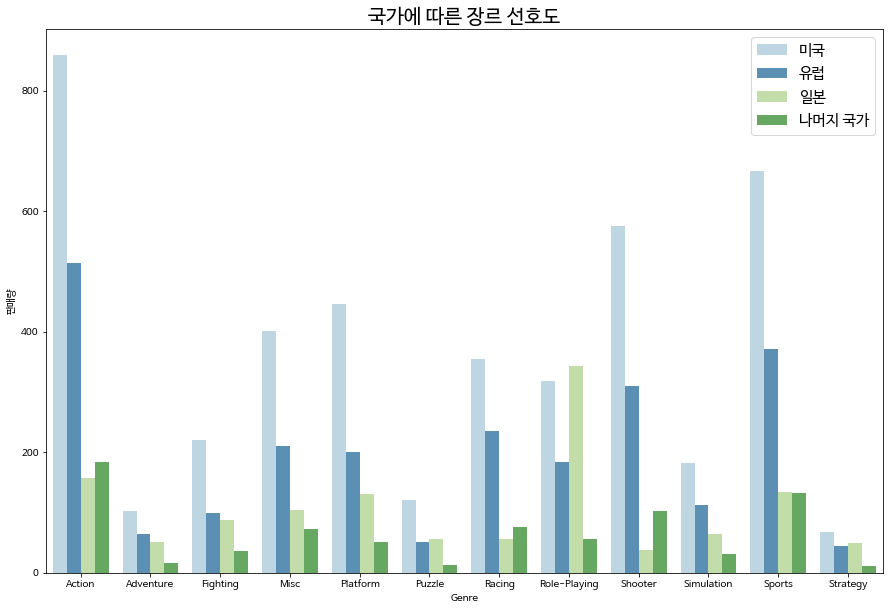

In [50]:
plt.figure(figsize=(15, 10))
colors = sns.color_palette('Paired',5)

sns.barplot(data=data_a1, x='Genre',y='판매량', hue='국가', alpha = 0.8, palette="Paired");
plt.title('국가에 따른 장르 선호도', fontsize=20)
plt.legend(fontsize=15)
plt.show()

국가에 따른 장르 선호도를 보면,
- 미국 : 액션을 가장 많이 선호 하며, 그 뒤를 이어서 스포츠, 슈팅 분야를 선호하는 편이다.
- 유럽 : 유럽도 액션을 가장 많이 선호하며, 그 뒤를 이어서 스포츠 - 롤플레잉을 많이 선호하는 편이다.
- 일본 : 일본은 롤플레잉 - 액션 장르를 선호하는 편이다.

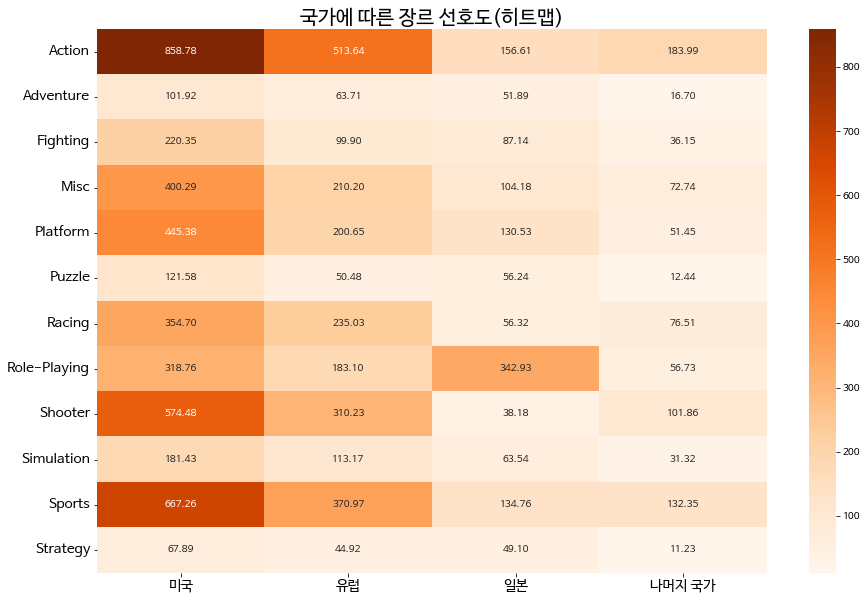

In [51]:
plt.figure(figsize= (15,10))

ax = sns.heatmap(data_a, annot=True, fmt = '.2f', cmap="Oranges")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('국가에 따른 장르 선호도(히트맵)', fontsize=20)
ax.set_ylabel('', fontsize=12)
plt.show()

## 2-2. 연도별 게임 트렌드 


### 연도별 게임 트렌드 출시량 통계

In [52]:
data_b = data.iloc[:,2:].drop(columns = data.columns[4:]) # 연도, 장르, 전 판매량 데이터 가져오기
data_b = data_b.groupby(['Year','Genre']).size().reset_index(name='EA') # 연도별 장르의 출시 갯수 


data_br = data_b[data_b.groupby(['Year'])['EA'].transform(max) == data_b.EA].reset_index().drop(columns = "index")
# Year 단위로 최고 출시량의 통계량을 계산해본다.
data_br = data_br.drop_duplicates(subset=['Year','EA'])

In [53]:
data_br.head()

,Year,Genre,EA
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3


### 연도별 게임 트렌트 판매량 통계

In [54]:
data_bs = data.iloc[:,2:].drop(columns = data.columns[4:9])
data_bs = data_bs.groupby(['Year','Genre'])['Total_Sales'].sum().reset_index(name='판매량')
data_bs = data_bs[data_bs.groupby(['Year'])['판매량'].transform(max) == data_bs.판매량].reset_index().drop(columns = "index")

In [55]:
data_bb = data_br.merge(data_bs, how = "outer", on="Year")
data_bb.head()

,Year,Genre_x,EA,Genre_y,판매량
0,1980,Misc,4,Shooter,7.07
1,1981,Action,25,Action,14.79
2,1982,Action,18,Puzzle,10.04
3,1983,Action,7,Platform,6.93
4,1984,Puzzle,3,Shooter,31.10


In [56]:
data_bb = data_bb.rename({'Year':'출시년도','Genre_x': '최고출시장르', 'Genre_y':'최고판매장르','EA':'출시한게임수'},axis=1)
data_bb.head()

,출시년도,최고출시장르,출시한게임수,최고판매장르,판매량
0,1980,Misc,4,Shooter,7.07
1,1981,Action,25,Action,14.79
2,1982,Action,18,Puzzle,10.04
3,1983,Action,7,Platform,6.93
4,1984,Puzzle,3,Shooter,31.10


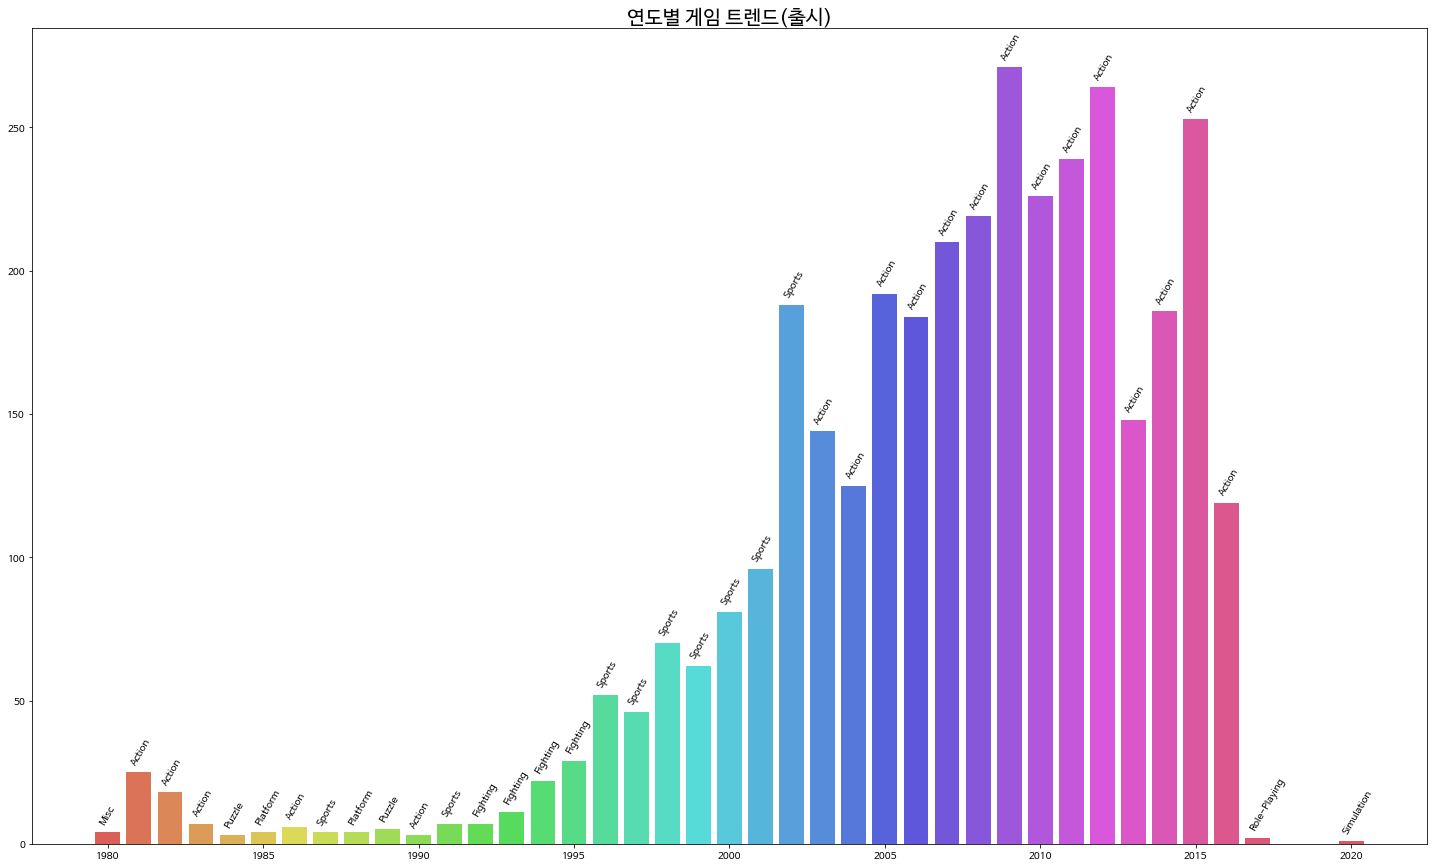

In [57]:
plt.figure(figsize = (25,15))
colors = sns.color_palette('hls',len(data_bb.index))  # 색상지정

plt.bar(data_bb.출시년도, data_bb.출시한게임수, color=colors);
# plt.bar(data_bb.출시년도, data_bb.판매량, color = '#6d9ede', alpha= 0.7);
plt.title('연도별 게임 트렌드(출시)', fontsize=20)
for i in data_bb.index:
  plt.annotate(data_bb.최고출시장르[i], (data_bb.출시년도[i] - 0.3, data_bb.출시한게임수[i] + 3),rotation=60)
plt.show()

연도별 장르 트렌드로 보면 액션 장르가 추세임을 확인할 수 있다.
즉, 게임회사에서는 주로 액션 장르의 트렌드를 따라가고 있음을 알려준다.

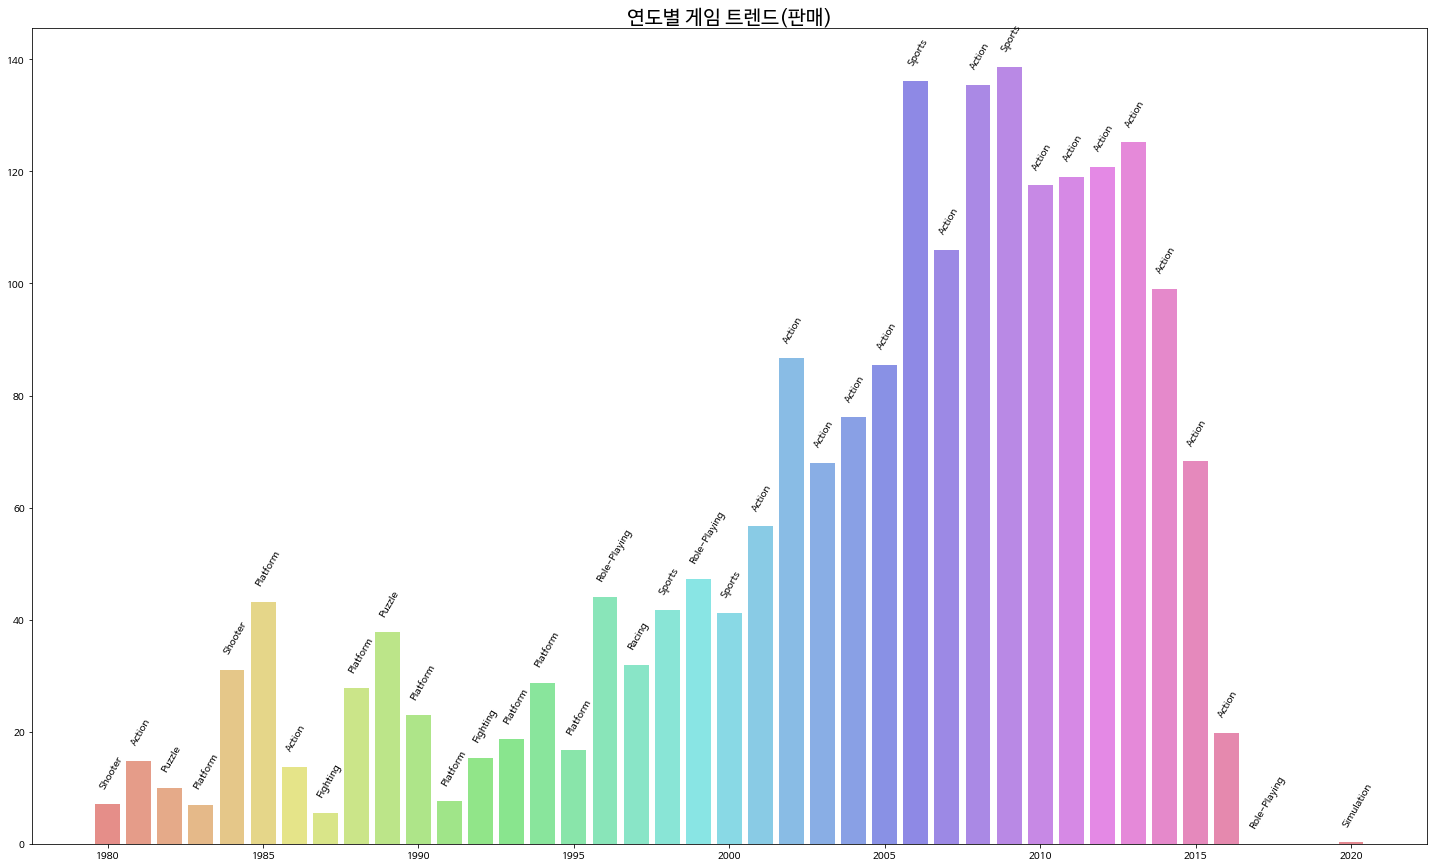

In [58]:
plt.figure(figsize = (25,15))
colors = sns.color_palette('hls',len(data_bb.index))  # 색상지정

plt.bar(data_bb.출시년도, data_bb.판매량, color=colors, alpha= 0.7);
plt.title('연도별 게임 트렌드(판매)', fontsize=20)
for i in data_bb.index:
  plt.annotate(data_bb.최고판매장르[i], (data_bb.출시년도[i] - 0.3, data_bb.판매량[i] + 3),rotation=60)
plt.show()

연도별 판매 트렌드를 확인했을 때,
2000년대 지나서부터 액션 장르가 추세임을 확인할 수 있다.
유저들도 액션장르의 게임을 좋아하는 것으로 알려진다.


## 2-3. 출고량이 높은 게임의 대한 분석
출고량이 높은 게임에 대해서 분석을 진행하기로 했다.

- 전체적인 가장 인기가 있었던 게임 TOP 10
- 연도별로 어떤 게임이 가장 인기가 많았는가?
- 나라별 출고량이 높은 게임
- 출고량이 높은 게임의 회사는?


In [59]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


### 2-3-1. 가장 인기가 높은 게임 Top 10

In [60]:
data_c = data.drop(columns= ['Platform','Genre','Publisher'])
data_c1 = data_c.sort_values('Total_Sales',ascending=False).reset_index()
data_c1 = data_c1.drop(columns='index').head(10)
data_c1

,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,2006,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,1985,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,2008,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,2009,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,1996,11.27,8.89,10.22,1.00,31.38
5,Tetris,1989,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,2006,11.38,9.23,6.50,2.90,30.01
7,Wii Play,2006,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,2009,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,1984,26.93,0.63,0.28,0.47,28.31


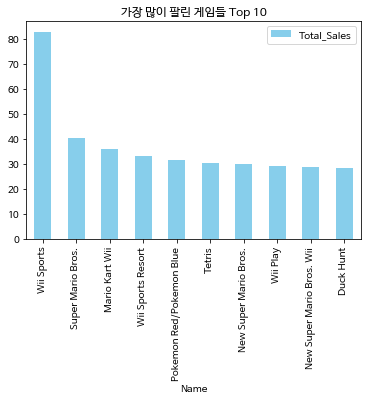

In [61]:
data_c1.plot.bar(x = 'Name', y = 'Total_Sales', 
                                 color = 'skyblue', 
                                 title = '가장 많이 팔린 게임들 Top 10');

인기있는 게임을 분석을 해본 결과 슈퍼마리오나 닌텐도 위 시리즈, 등 닌텐도 계열의 게임작품등이 많이 팔린 것으로 보인다.

### 2-3-2. 연도별 출고량이 높은 게임

In [62]:
data_c2 = data_c.drop(data_c.columns[2:6], axis=1)
data_cy = data_c2.groupby(['Year','Name'])['Total_Sales'].sum().reset_index(name='판매량')

In [63]:
data_cy = data_cy.rename({'Year':'출시년도','Name':'게임이름'},axis=1)
data_cy = data_cy[data_cy.groupby(['출시년도'])['판매량'].transform(max) == data_cy.판매량]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)


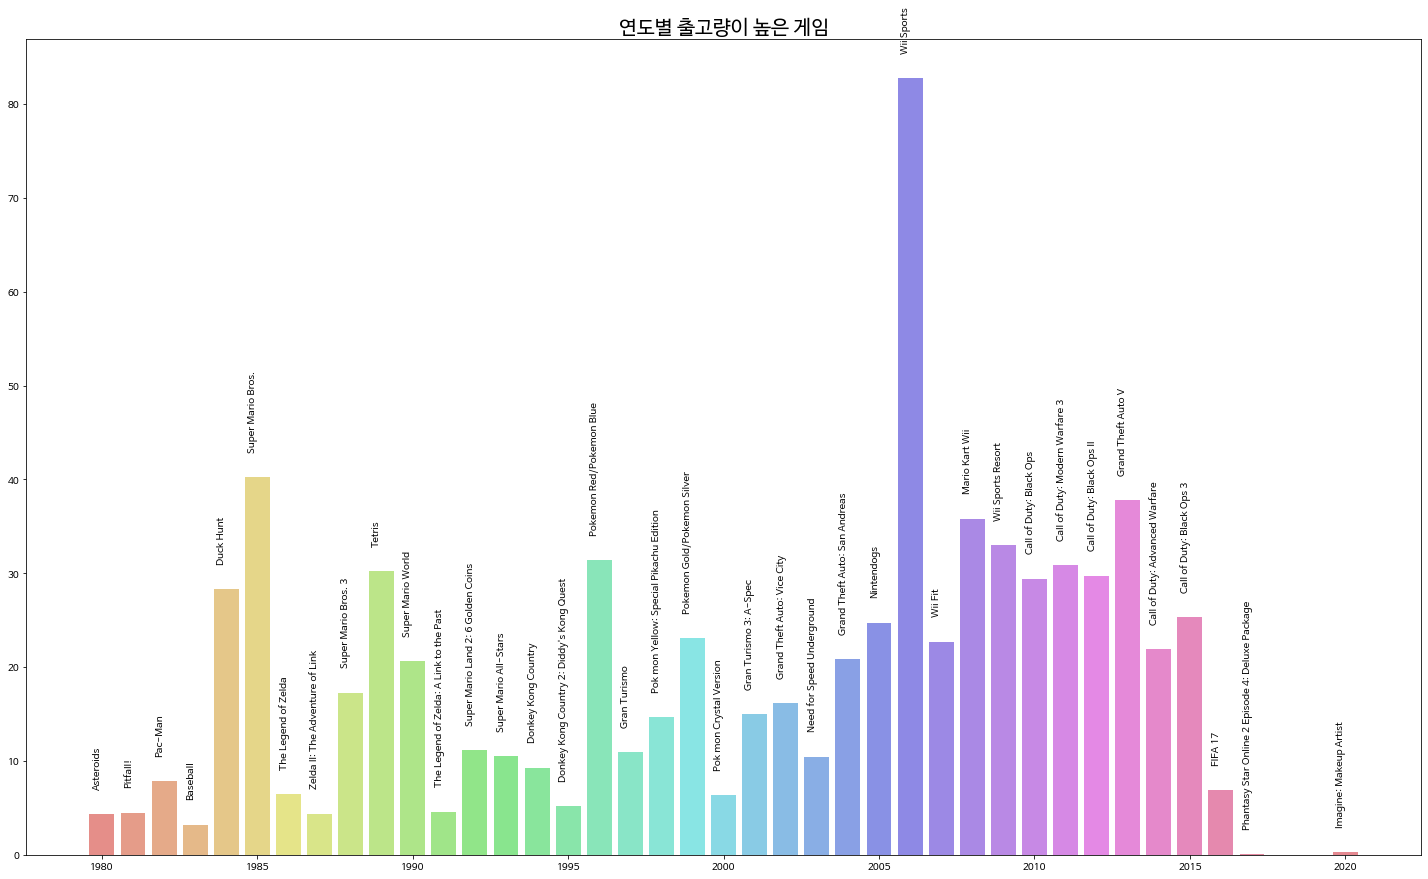

In [64]:
plt.figure(figsize = (25,15))
colors = sns.color_palette('hls',len(data_cy.index))  # 색상지정

plt.bar(data_cy.출시년도, data_cy.판매량, color=colors, alpha= 0.7);
plt.title('연도별 출고량이 높은 게임', fontsize=20)
for i in data_cy.index:
  plt.annotate(data_cy.게임이름[i], (data_cy.출시년도[i] - 0.3, data_cy.판매량[i] + 3),rotation=90)
plt.show()

In [65]:
data_cy.tail(10)

,출시년도,게임이름,판매량
8705,2009,Wii Sports Resort,33.00
8832,2010,Call of Duty: Black Ops,29.41
9724,2011,Call of Duty: Modern Warfare 3,30.84
10470,2012,Call of Duty: Black Ops II,29.73
10987,2013,Grand Theft Auto V,37.77
11236,2014,Call of Duty: Advanced Warfare,21.89
11561,2015,Call of Duty: Black Ops 3,25.30
11947,2016,FIFA 17,6.90
12097,2017,Phantasy Star Online 2 Episode 4: Deluxe Package,0.04
12098,2020,Imagine: Makeup Artist,0.29


연도별 출고량이 높은 게임을 확인 해본결과,  `Call of Duty` 시리즈 나 `GTA`, `Wii`, `SuperMArio` 등 시리즈 물들이 게임 판매량이 높은 것으로 보인다.

### 번외) 미국의 선호 게임 분석
지역별 선호 게임 장르 분석을 했었을 때, 가장 비중이 많았던 미국의 액션 장르 선호 였다. 
그래서 미국의 게임 선호는 어떠한지 분석해보기로 했다.
> 데이터가 많은 샘플을 택해야 신뢰도가 높은 게임이 나오기 때문이다.

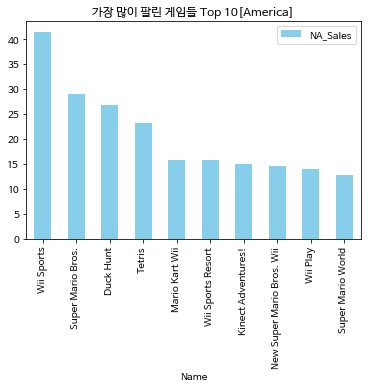

In [80]:
data_cNA = data_c[data_c.columns[0:3]].sort_values('NA_Sales',ascending=False).head(10)
data_cNA.plot.bar(x = 'Name', y = 'NA_Sales', color = 'skyblue', title = '가장 많이 팔린 게임들 Top 10[America]');

액션 장르에서의 Top 10

In [93]:
data_cAc = data.drop(data.columns[6:9], axis=1)
data_cAc = data_cAc.drop(['Platform','Publisher'], axis=1)

In [99]:
data_cAc = data_cAc.loc[data_cAc.Genre == 'Action']

In [102]:
data_cAc.sort_values('NA_Sales',ascending=False).head(10)

,Name,Year,Genre,NA_Sales,Total_Sales
10714,Grand Theft Auto V,2013,Action,9.63,16.38
14387,Grand Theft Auto: San Andreas,2004,Action,9.43,20.81
5236,Grand Theft Auto: Vice City,2002,Action,8.41,16.15
3420,Grand Theft Auto V,2013,Action,7.01,21.39
9615,Grand Theft Auto III,2001,Action,6.99,13.10
13656,Grand Theft Auto IV,2008,Action,6.76,11.03
16156,Grand Theft Auto IV,2008,Action,4.76,10.58
4712,Pokemon HeartGold/Pokemon SoulSilver,2009,Action,4.40,11.90
1935,The Legend of Zelda: Ocarina of Time,1998,Action,4.10,7.60
1022,The Legend of Zelda: Twilight Princess,2006,Action,3.83,7.32


In [104]:
data_cAc.sort_values('Total_Sales',ascending=False).head(10)

,Name,Year,Genre,NA_Sales,Total_Sales
3420,Grand Theft Auto V,2013,Action,7.01,21.39
14387,Grand Theft Auto: San Andreas,2004,Action,9.43,20.81
10714,Grand Theft Auto V,2013,Action,9.63,16.38
5236,Grand Theft Auto: Vice City,2002,Action,8.41,16.15
9615,Grand Theft Auto III,2001,Action,6.99,13.10
1978,Grand Theft Auto V,2014,Action,3.80,11.99
4712,Pokemon HeartGold/Pokemon SoulSilver,2009,Action,4.40,11.90
13656,Grand Theft Auto IV,2008,Action,6.76,11.03
16156,Grand Theft Auto IV,2008,Action,4.76,10.58
8874,FIFA Soccer 13,2012,Action,1.06,8.25


대체적으로 액션 장르에서 미국의 선호도는 GTA 시리즈 물이 높은 것으로 보인다. 그이후로 포켓몬스터, 젤다의 전설이 그 뒤를 이었다.

### 번외 ) 일본의 선호 게임 분석

In [106]:
data_cJP = data.drop(data.columns[8:], axis=1)
data_cJP = data_cJP.drop(['Platform','Publisher'], axis=1)

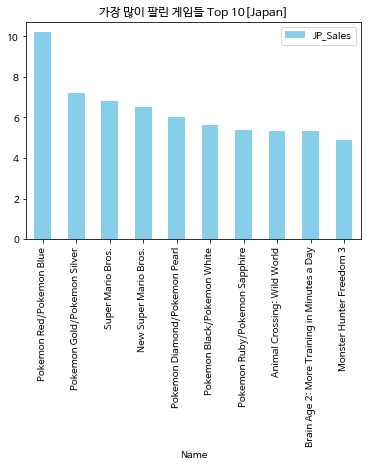

In [110]:
data_cJP = data_cJP.sort_values('JP_Sales',ascending=False).head(10)
data_cJP.plot.bar(x = 'Name', y = 'JP_Sales', color = 'skyblue', title = '가장 많이 팔린 게임들 Top 10[Japan]');

일본의 경우, 포켓몬스터와 슈퍼마리오가 높은 판매량을 나타내는 것으로 보인다.
공통적으로 시리즈물이 인기를 끌었다.

### 번외) 유럽의 선호 게임 분석

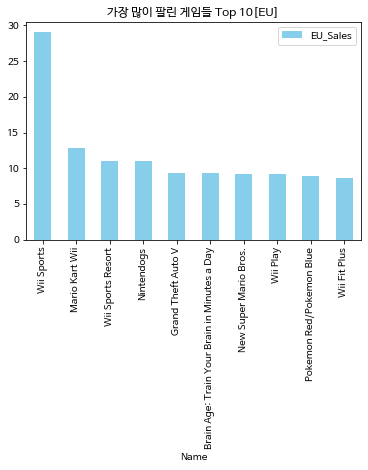

In [112]:
data_cEU = data.drop(data.columns[7:], axis=1)
data_cEU = data_cEU.drop(['Platform','Publisher'], axis=1)

data_cEU = data_cEU.sort_values('EU_Sales',ascending=False).head(10)
data_cEU.plot.bar(x = 'Name', y = 'EU_Sales', color = 'skyblue', title = '가장 많이 팔린 게임들 Top 10[EU]');

### 번외) 나머지 나라의 선호 게임 분석

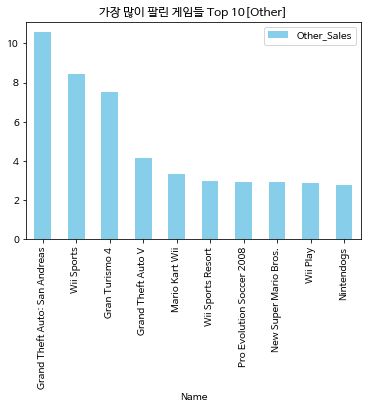

In [113]:
data_cOt = data.drop(data.columns[1:8], axis=1)

data_cOt = data_cOt.sort_values('Other_Sales',ascending=False).head(10)
data_cOt.plot.bar(x = 'Name', y = 'Other_Sales', color = 'skyblue', title = '가장 많이 팔린 게임들 Top 10[Other]');

## 2-3-3. 출고량이 높은 게임의 회사

In [140]:
data_c3 = data.drop(data.columns[5:9], axis =1)

In [141]:
data_c3 = data_c3.groupby(['Publisher','Name'])['Total_Sales'].sum().reset_index(name='판매량')
data_c3

,Publisher,Name,판매량
0,10TACLE Studios,Boulder Dash: Rocks!,0.03
1,10TACLE Studios,Panzer Tactics,0.06
2,10TACLE Studios,Pirates: Legend of the Black Buccaneer,0.02
3,1C Company,King's Bounty: Armored Princess,0.01
4,1C Company,Men of War: Assault Squad,0.05
...,...,...,...
11695,imageepoch Inc.,SoniPro,0.01
11696,imageepoch Inc.,Toushin Toshi,0.03
11697,inXile Entertainment,Wasteland 2,0.09
11698,"mixi, Inc",Monster Strike 3DS,0.86


In [150]:
data_c3.sort_values(by='판매량',ascending=False).head(10) 

,Publisher,Name,판매량
7287,Nintendo,Wii Sports,82.74
10024,Take-Two Interactive,Grand Theft Auto V,55.92
7180,Nintendo,Super Mario Bros.,45.31
7223,Nintendo,Tetris,35.84
6953,Nintendo,Mario Kart Wii,35.83
7289,Nintendo,Wii Sports Resort,33.00
7097,Nintendo,Pokemon Red/Pokemon Blue,31.38
512,Activision,Call of Duty: Modern Warfare 3,30.84
7031,Nintendo,New Super Mario Bros.,30.01
508,Activision,Call of Duty: Black Ops II,29.73
